# Demonstration of `donut_plot_with_total_summary_and_subgroups_from_dataframe.py`

Demonstrating use of `donut_plot_with_total_summary_and_subgroups_from_dataframe.py`, see [here](https://github.com/fomightez/donut_plots_with_subgroups) for more information.

This is a full-featured script that makes a plot similar to [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) to the right of a plot that summarizes the subgroups. This script is full-featured **without further need for coding** that allows you to plug in your own data input. 

In the current form, these scripts and demonstration notebook work in JupyterLab, too.

## Preparation and displaying USAGE block

Let's get the script and run 'Help' on it to see the basic USAGE block.

(If you are running this notebook in the session launched from the repo that includes the script, this step is not necessary. However, it is included because there is no harm in running it here and you may be wanting to run this elsewhere or see how to easily acquire the script. If you are on the actual command line, you'd leave off the exclamtation point.)

In [1]:
import os
file_needed = "donut_plot_with_total_summary_and_subgroups_from_dataframe.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/donut_plots_with_subgroups/master/donut_plot_with_total_summary_and_subgroups_from_dataframe.p

In [2]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py -h

usage: donut_plot_with_total_summary_and_subgroups_from_dataframe.py
       [-h] [-li] [-lopg] [-lotg] [-svg] [-ssn] [-hll HILOLIST]
       [-ac ADVANCE_COLOR]
       DF_FILE STATUS_COL GROUPS

donut_plot_with_total_summary_and_subgroups_from_dataframe.py takes a
dataframe, and some information about columns in the dataframe and makes two
donut plots. One plot is the total of the specified binary data (such as
present or not present, +/-, True or False), and the other plot is a further
breakdown of the binary state per categorical classification or grouping. ****
Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  DF_FILE               Name of file containing the dataframe. Whether it is
                        in the form of a pickled dataframe, tab-separated
                        text, or comma-separated text needs to be indicated by
                        the file extension. So `.pkl`, `.tsv`, or `.csv` for
                        the file extension.
  STATU

## Use the script by calling it from the command line

A dataframe will be used for input data. To fully demonstrate the options for the script we'll use two dataframes.

In [3]:
import pandas as pd
sales = [('Jones LLC', 177887, 'yes'),
         ('Jones LLC', 12387, 'yes'),
         ('Jones LLC', 1772287, 'yes'),
         ('Jones LLC', 1187, 'maybe'),
         ('Jones LLC', 1773297, 'maybe'),
         ('Jones LLC', 19897, 'no'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Alpha Co', 1999917, 'maybe'),
         ('Alpha Co', 193917, 'maybe'),
         ('Alpha Co', 1933917, 'maybe'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 256521, 'no'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
df = pd.DataFrame.from_records(sales, columns=labels)
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe


In [4]:
import pandas as pd
obs = [('A', 1, "frizzled"), 
       ('A', 1, "lethargic"), 
       ('A', 1, "polythene"), 
       ('A', 1, "epic"),
       ('A', 2, "frizzled"), 
       ('A', 2, "lethargic"), 
       ('A', 2, "epic"),
       ('A', 3, "frizzled"), 
       ('A', 3, "lethargic"),
       ('A', 3, "polythene"),
       ('A', 3, "epic"),
       ('A', 3, "bedraggled"),
       ('B', 1, "frizzled"), 
       ('B', 1, "lethargic"),
       ('B', 1, "polythene"),
       ('B', 1, "epic"),
       ('B', 1, "bedraggled"),
       ('B', 1, "moombahcored"),
       ('B', 2, "frizzled"), 
       ('B', 2, "lethargic"),
       ('B', 2, "polythene"),
       ('B', 2, "epic"),
       ('B', 2, "bedraggled"),
       ('C', 1, "frizzled"), 
       ('C', 1, "lethargic"),
       ('C', 1, "polythene"),
       ('C', 1, "epic"),
       ('C', 1, "bedraggled"),
       ('C', 1, "moombahcored"),
       ('C', 1, "zoned"),
       ('C', 1, "erstaz"),
       ('C', 1, "mined"),
       ('C', 1, "liberated"),
       ('C', 2, "frizzled"), 
       ('C', 2, "lethargic"),
       ('C', 2, "polythene"),
       ('C', 2, "epic"),
       ('C', 2, "bedraggled"),
       ('C', 3, "frizzled"), 
       ('C', 3, "lethargic"),
       ('C', 3, "polythene"),
       ('C', 3, "epic"),
       ('C', 3, "bedraggled"),
       ('C', 4, "bedraggled"),
       ('C', 4, "frizzled"), 
       ('C', 4, "lethargic"),
       ('C', 4, "polythene"),
       ('C', 4, "epic"),
       ('C', 5, "frizzled"), 
       ('C', 5, "lethargic"),
       ('C', 5, "polythene"),
       ('C', 5, "epic"),
       ('C', 5, "bedraggled"),
       ('C', 5, "moombahcored")]
labels = ['group', 'subgroup', 'sub-subgroup']
dfo = pd.DataFrame.from_records(obs, columns=labels)
dfo.head()

,group,subgroup,sub-subgroup
0,A,1,frizzled
1,A,1,lethargic
2,A,1,polythene
3,A,1,epic
4,A,2,frizzled


Let's save that dataframe as tabular text and also as a Pickled pickled dataframe. The former being human readable and the latter not. The latter is more efficient at storeage though if that is an issue.

First to save as tabular text in tab-separated form. You could change it to be comma-separated, CSV, if you choose.

In [5]:
df.to_csv('data.tsv', sep='\t',index = False)
dfo.to_csv('datao.tsv', sep='\t',index = False)

Now to save the pickled dataframe.

In [6]:
df.to_pickle("data.pkl")
dfo.to_pickle("datao.pkl") 

Now that we have files with input data, we have something we can point the script at for running it.

In addition to providing the data input file name, the column heading of the binary data and the column heading of the grouping set have to be provided when calling the script.

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


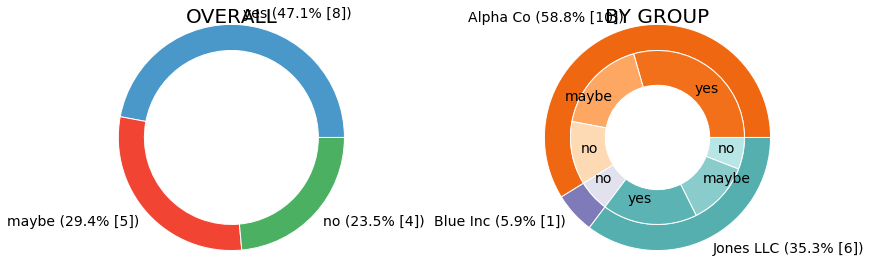

In [7]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py data.tsv In_Stock Manufacturer

With the addition of the `--sort_on_subgroup_name` the result is like the example in ordering of the subgroups in the [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) with the '#1' group coming first, the '#2' group coming second, the '#3' group coming third, etc. in order of the plotting. Instead of the ordering being distated by the size of the subgroup.

To illustrate this we'll need the dataframe used as the example on the first page of this series. First we'll run it without the setting:

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


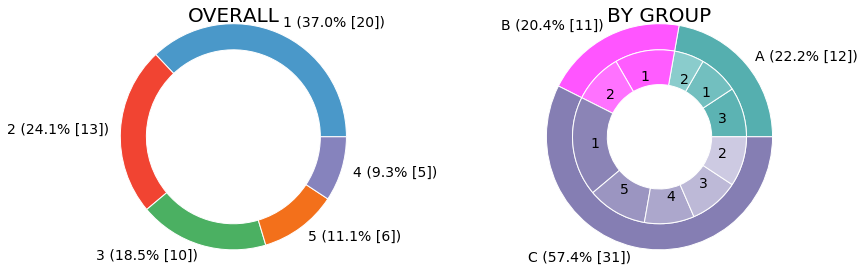

In [8]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py datao.tsv subgroup group

Now with this option:

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


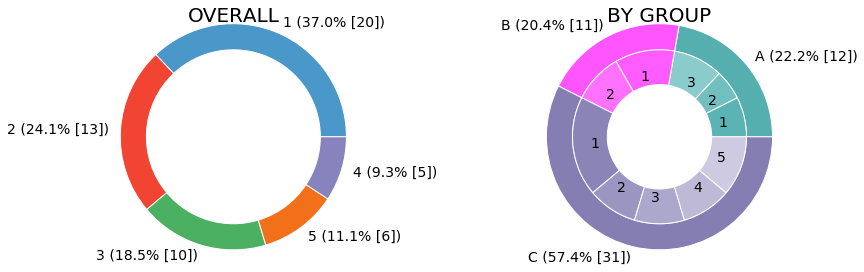

In [9]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py datao.tsv subgroup group --sort_on_subgroup_name

The `--large_image` flag can be added to make the plot figure saved larger. 

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot_larger.png


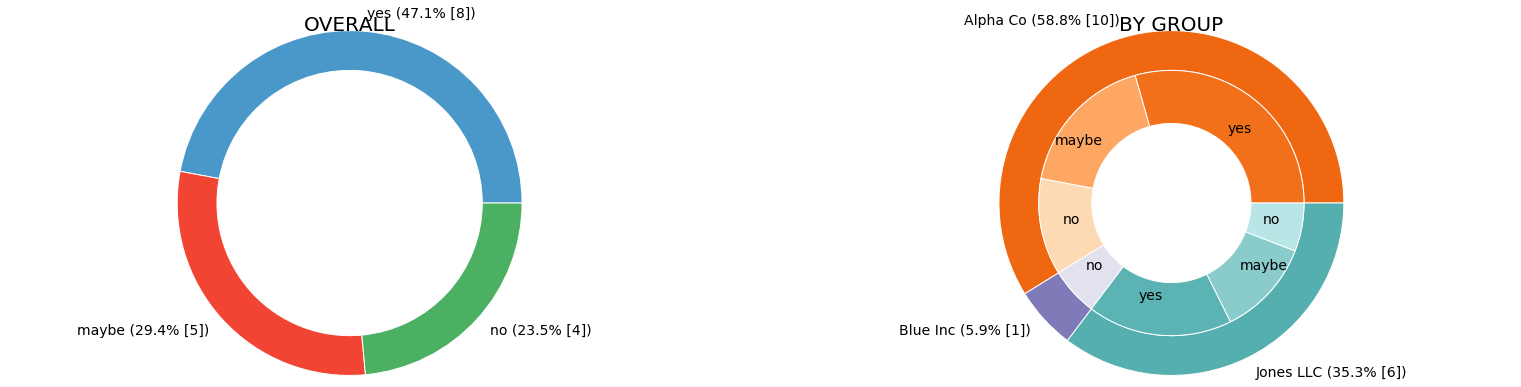

In [10]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py data.tsv  In_Stock Manufacturer --large_image 

The `--leave_off_percent_in_group` and `--leave_off_total_in_group` options can be used to control whether the percent or total show up in the plot labels. 
For example, putting both flags will leave both off:

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


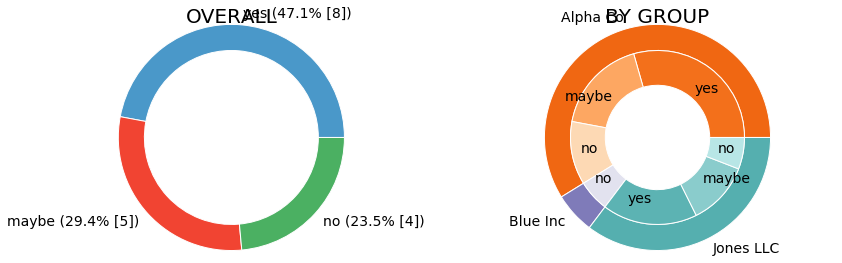

In [11]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py data.tsv In_Stock Manufacturer --leave_off_percent_in_group --leave_off_total_in_group

The `--advance_color` option followed by an integer can be added to the call to the script to advance the colors initially used from the sequential color palette generator. This is meant to try to make it easier to customize the output to a color combination that seems pleasing without needing to edit the code in the script. (If you want to specify your own colors, you can edit the `list_of_other_good_sequences` and run the with `-ac 4`. [Alternatively you can edit the `color_brewer_seq_names` and not advance the color generator.])

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


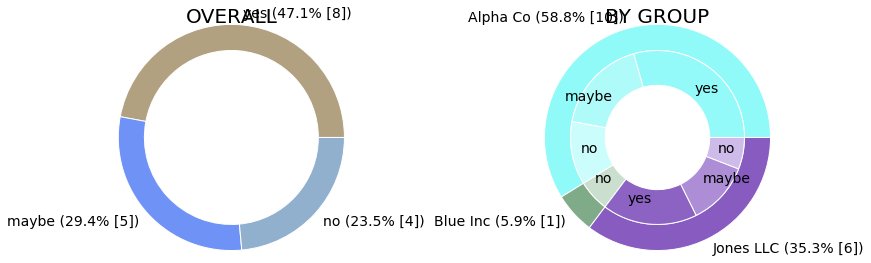

In [12]:
%run donut_plot_with_total_summary_and_subgroups_from_dataframe.py data.tsv  In_Stock Manufacturer --advance_color 61

You can change the size of the  image file made with the larger setting by adjusting `large_img_size ` under 'USER ADJUSTABLE VALUES' section in the script code.  
Additional customization is possible simply editing settings under the 'USER ADJUSTABLE VALUES' section in the script code file.


----

## Use script in a Jupyter or IPython by calling the main function

This will demonstrate importing the main function into a Jupyer environment or IPython console.

Note that it gives you a few more options because it exposes more control as you can set whether to include the subplot titles or adjust after generation the size of the plot, etc..

First, we'll use the files for the dataframe and tabular text saved earlier in the example. After that will move on to not using files and instead use Python objects that are in the memory of the notebook.

We will need to import the main function of the script to be active in the running notebook environment. (There is no harm to running it again even if already run in earlier sections.)

In [13]:
from donut_plot_with_total_summary_and_subgroups_from_dataframe import donut_plot_with_total_summary_and_subgroups_from_dataframe

Now to try using that with the files from earlier in the demonstration.

First, we'll use the tab-separated table.

It is very similar to using the script from the command line. Here, though we have to specify the input type as file or an in-memory dataframe when we call the function. Provide a file name for `df_file` for using a data file as input. Then specify the colum with the binary data and the column to use in grouping like the following.

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

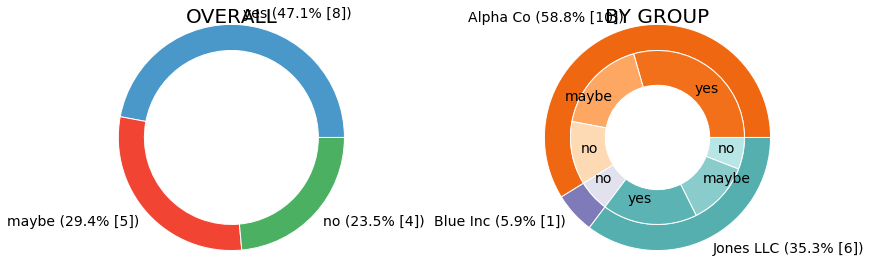

In [14]:
donut_plot_with_total_summary_and_subgroups_from_dataframe(df_file="data.tsv",state4subgroup_col ="In_Stock",grouping_col="Manufacturer");

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

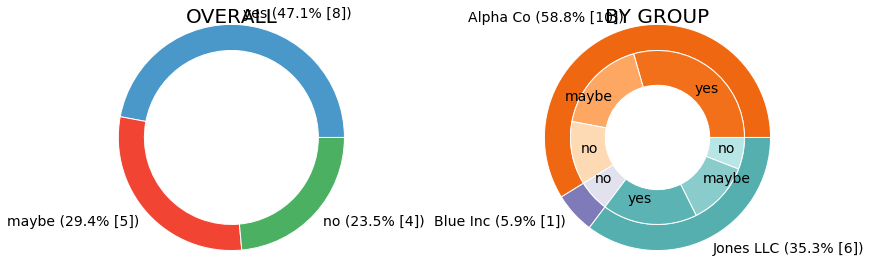

In [15]:
donut_plot_with_total_summary_and_subgroups_from_dataframe(df_file="data.pkl",state4subgroup_col ="In_Stock",grouping_col="Manufacturer");

However, the function can also take an in-memory dataframe directly. Let's next see a demonstration of that. 

To be sure a dataframe is in memory, we'll read in one from the file saved earlier.  
You may note that this step is redundant if you are running all these cells in order, and the one made earlier is in memory still; however, I want to be sure all is on the same page before the next steps while emphasizing here the switch from using a file as data to something in the memory of the current notebook.

In [16]:
df = pd.read_pickle("data.pkl")

We can look at the start of that dataframe to verify it is in memory now.

In [17]:
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe


Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

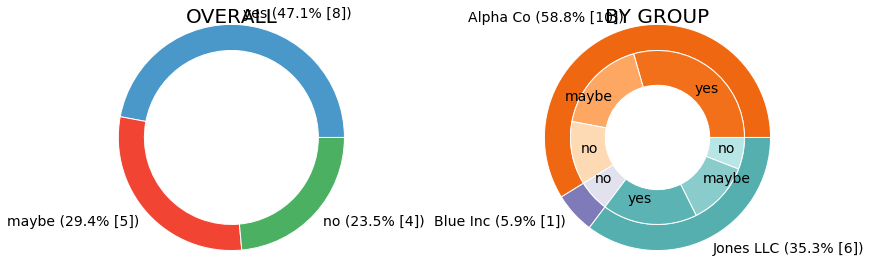

In [18]:
x = donut_plot_with_total_summary_and_subgroups_from_dataframe(df=df,state4subgroup_col ="In_Stock",grouping_col="Manufacturer");

Note that, similar to how the `--sort_on_subgroup_name` flag was used when calling the script as you would on the command line, `sort_on_subgroup_name=True` was also added when calling the function above to better reflect the style of the [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) shown above. The defatult is `sort_on_subgroup_name=False` if no setting for `sort_on_subgroup_name` is specified.

Additionally, in a parallel to the use of `--leave_off_percent_in_group` or  `--leave_off_total_in_group`, the function can be called with `include_percent_in_grp_label=False` or `include_total_in_grp_label=False` or both to control if the percent or total or both are shown in the group label. They default is to show them both if no settings are provided for thises.

The size of the plot can be set a couple of ways when running the script as a function.

About size, the script is run with `fig=plt.figure(figsize=(14, 4))` set by the 'default' setting `plot_figure_size`.

`plot_figure_size` can be adjusted in the script.  
Alternatively, and perhaps easier when working in Jupyter or IPython, the resulting plot can be enlarged after the fact with `x.figure.set_size_inches((28, 9))`.
(Note setting adjusting `plot_figure_size` in the current version of script to give to `fig=plt.figure(figsize=(28, 9))`and restarting kernel and running again will also give that.)

The adjusted figure can be saved as shown in the example, too.

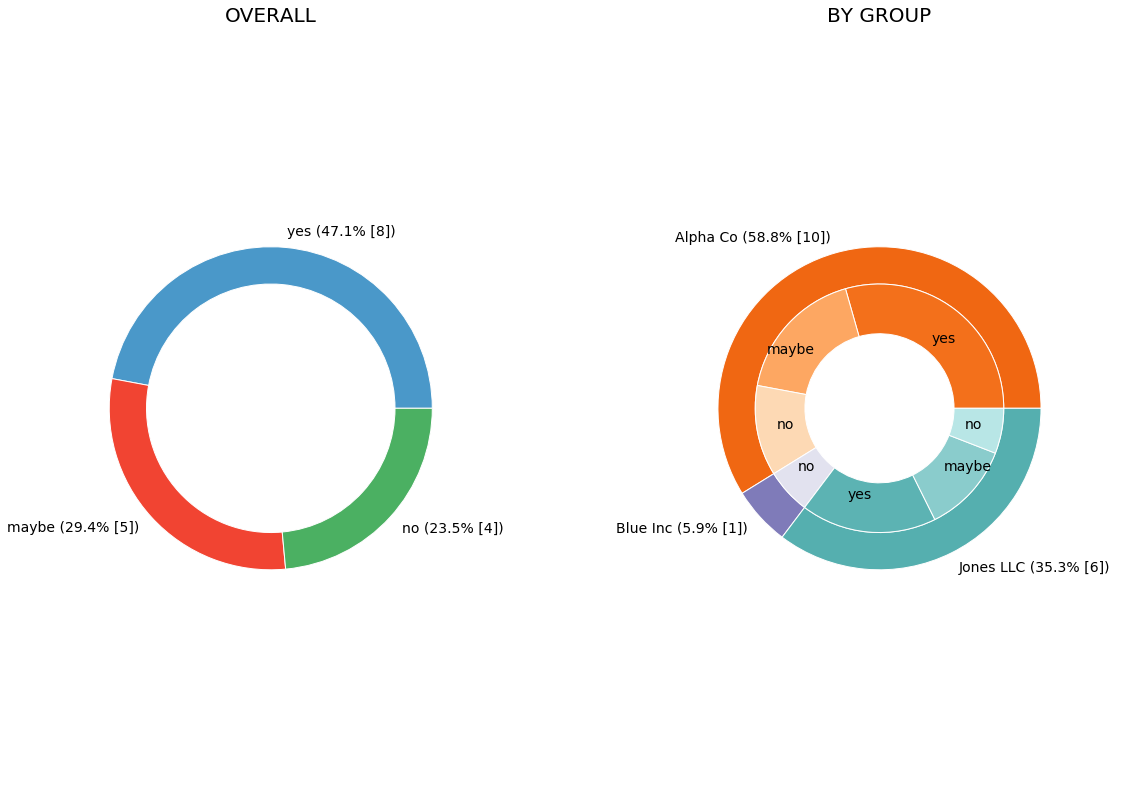

In [19]:
import matplotlib.pyplot as plt
#x.figure(figsize=(17, 11)) # Doesn't work
#plt.figure(figsize=(17, 11)) # Doesn't work
x.figure.set_size_inches((20, 14)) #<--see bottom of section at 
# https://nbviewer.jupyter.org/github/fomightez/cl_sq_demo-binder/blob/master/notebooks/Demo%20of%20script%20to%20plot%20nt%20imbalance%20for%20sequence%20span.ipynb#Use-script-in-a-Jupyter-notebook
x.figure.savefig("larger_gen_demo.png")
x.figure

That way of adjusting size doesn't change settings for all plots. As can be seen by the next cell. However, it changes size of `x` until it is reassigned.

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

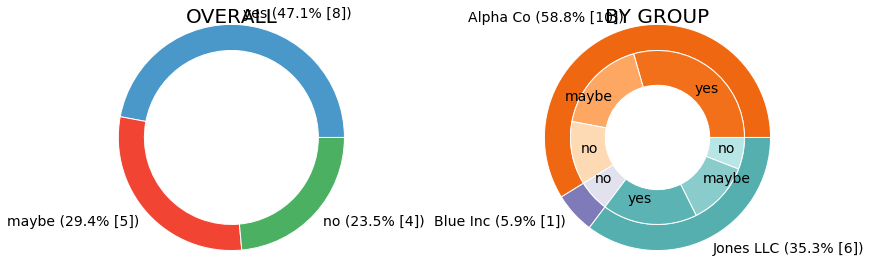

In [20]:
y = donut_plot_with_total_summary_and_subgroups_from_dataframe(df=df,state4subgroup_col ="In_Stock",grouping_col="Manufacturer");

If you start adjusting `plot_figure_size` in the script to a large degree, you may also want to adjust text size settings below that under 'USER ADJUSTABLE VALUES' in the script. Another possibility is turning off plot titles using `include_subplot_titles=False`, also under 'USER ADJUSTABLE VALUES', in favor of adding your own in post-processing.

An amount of times to advance the color from the starting options can be specified when calling the function using the `advance_color_increments` variable assigned to the amount of steps to advance.

Note:No list to specify high to low intensity coloring provided and so using 'yes,maybe,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

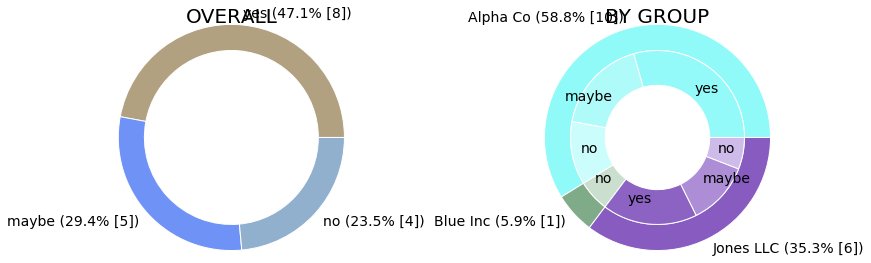

In [21]:
b = donut_plot_with_total_summary_and_subgroups_from_dataframe(df=df,state4subgroup_col ="In_Stock",grouping_col="Manufacturer",advance_color_increments=61);

If trying different numbers for the advancing increments still fails to help you find a color combination you like, then you can specify your own colors. You can do that by editing the `list_of_other_good_sequences` and then running the function the with `-ac 4`. (Alternatively you can edit the `color_brewer_seq_names` and not advance the color generator.) To re-import updated the function after editing. The easiest thing to do is restart the kernel in the notebook.

----

----

If you'd like to better understand how the underlying code for this script works, see [the previous one](demo_basics_from_df.ipynb) in this series.  
If you'd like another option for scripts/functions that generate plots that feature summary plots in addition to a plot with subgroups, check out each of the following notebook in the series: 

- [Demonstrate a full-featured script that plots a summary for binary data in addition to the donut plot with the binary group broken down by a group](demo_summary_binary.ipynb)

If you'd like an option like the plot on the right here but don't want a summary, see [here](index.ipynb).

----


----